## 3  Relación del pib de una población con su IMC.

### Los datos han sido obtenidos de la página: IMC mundial https://www.wikipedia.org/ , Habitantes por país https://datacatalog.worldbank.org/dataset/population-ranking y pib mundial https://datacatalog.worldbank.org/dataset/gdp-ranking

### Vamos a limpiar los 3 ficheros y unificarlos para estudiarlo con Tableau.
### También hay un pequeño modelo si es lineal el pib con el imc.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
name_bmi = "bmi_mundial_wikipedia.xlsx"

In [3]:
name_pib = "pib_mundial.xls"

In [4]:
name_poblacion = "poblacion_mundial.xls"

In [5]:
path_to_zips = "/home/dsc/Desktop/TFM/DATA/"

In [6]:
#limpieza del fichero de bmi_mundial_wikipedia.

In [7]:
dataset_bmi = path_to_zips + name_bmi

In [8]:
df_bmi = pd.read_excel(dataset_bmi)

In [9]:
df_bmi.head()

,Country,Unnamed: 1,Overall,Overall mean,Female,Female mean,Male,Male mean
0,NaN,NaN,rank,BMI (kg/m2),rank,BMI (kg/m2),rank,BMI (kg/m2)
1,Nauru,NaN,1,32.5,3,32.8,1,32.1
2,Tonga,NaN,2,31.9,1,33.5,2,30.4
3,Samoa,NaN,3,31.7,1,33.5,3,29.9
4,Kuwait,NaN,4,30,6,30.8,4,29.5


In [10]:
df_bmi.tail()

,Country,Unnamed: 1,Overall,Overall mean,Female,Female mean,Male,Male mean
192,Liechtenstein,NaN,-,-,-,-,-,-
193,Monaco,NaN,-,-,-,-,-,-
194,San Marino,NaN,-,-,-,-,-,-
195,Taiwan,NaN,-,-,-,-,-,-
196,Vatican City,NaN,-,-,-,-,-,-


In [11]:
df_bmi.shape

(197, 8)

In [12]:
df_bmi.columns.tolist()

['Country',
 'Unnamed: 1',
 'Overall',
 'Overall mean',
 'Female',
 'Female mean',
 'Male',
 'Male mean']

In [13]:
bmi = df_bmi.filter(items=["Country", "Male mean", "Female mean"])

In [14]:
bmi.head()

,Country,Male mean,Female mean
0,NaN,BMI (kg/m2),BMI (kg/m2)
1,Nauru,32.1,32.8
2,Tonga,30.4,33.5
3,Samoa,29.9,33.5
4,Kuwait,29.5,30.8


In [15]:
bmi_mundial = bmi.drop(bmi.index[0])

In [16]:
bmi_mundial.head()

,Country,Male mean,Female mean
1,Nauru,32.1,32.8
2,Tonga,30.4,33.5
3,Samoa,29.9,33.5
4,Kuwait,29.5,30.8
5,Saint Kitts and Nevis,28.4,30.9


In [17]:
bmi_mundial.shape

(196, 3)

In [18]:
#limpieza del fichero de pib_mundial.

In [19]:
dataset_pib = path_to_zips + name_pib

In [20]:
prueba_df_pib = pd.read_excel(dataset_pib, skiprows =1)

In [21]:
prueba_df_pib.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,(millions of,NaN
1,NaN,Ranking,NaN,Economy,US dollars),NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,1,NaN,United States,19390604,NaN
4,CHN,2,NaN,China,1.22377e+07,NaN
5,JPN,3,NaN,Japan,4.87214e+06,NaN
6,DEU,4,NaN,Germany,3.67744e+06,NaN
7,GBR,5,NaN,United Kingdom,2.62243e+06,NaN
8,IND,6,NaN,India,2.59749e+06,NaN
9,FRA,7,NaN,France,2.5825e+06,NaN


In [22]:
prueba_df_pib.tail(40)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
202,TUV,200,NaN,Tuvalu,39.7313,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN
204,ABW,NaN,NaN,Aruba,..,NaN
205,BMU,NaN,NaN,Bermuda,..,NaN
206,VGB,NaN,NaN,British Virgin Islands,..,NaN
207,CYM,NaN,NaN,Cayman Islands,..,NaN
208,CHI,NaN,NaN,Channel Islands,..,NaN
209,CUW,NaN,NaN,Curaçao,..,NaN
210,ERI,NaN,NaN,Eritrea,..,NaN
211,PYF,NaN,NaN,French Polynesia,..,NaN


In [23]:
df_pib = pd.read_excel(dataset_pib, skiprows =4,skipfooter=39)

In [24]:
df_pib.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,USA,1,NaN,United States,1.939060e+07,NaN
1,CHN,2,NaN,China,1.223770e+07,NaN
2,JPN,3,NaN,Japan,4.872137e+06,NaN
3,DEU,4,NaN,Germany,3.677439e+06,NaN
4,GBR,5,NaN,United Kingdom,2.622434e+06,NaN


In [25]:
df_pib.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
195,PLW,196,NaN,Palau,291.544300,NaN
196,MHL,197,NaN,Marshall Islands,199.399247,NaN
197,KIR,198,NaN,Kiribati,196.150061,NaN
198,NRU,199,NaN,Nauru,113.884908,NaN
199,TUV,200,NaN,Tuvalu,39.731317,NaN


In [26]:
df_pib.columns.tolist()

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5']

In [27]:
df_pib_rename= df_pib.rename(columns={"Unnamed: 3" : "Country", "Unnamed: 4": "Million Dolar"} )

In [28]:
df_pib_rename.columns.tolist()

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Country',
 'Million Dolar',
 'Unnamed: 5']

In [29]:
pib_mundial = df_pib_rename.filter(items=["Country","Million Dolar"])

In [30]:
pib_mundial.head()

,Country,Million Dolar
0,United States,1.939060e+07
1,China,1.223770e+07
2,Japan,4.872137e+06
3,Germany,3.677439e+06
4,United Kingdom,2.622434e+06


In [31]:
#limpieza del fichero de poblacion_mundial.

In [32]:
dataset_poblacion = path_to_zips + name_poblacion

In [33]:
prueba_df_poblacion= pd.read_excel(dataset_poblacion, skiprows =1)

In [34]:
prueba_df_poblacion.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Ranking,NaN,Economy,(thousands),NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,CHN,1,NaN,China,1386395,NaN
4,IND,2,NaN,India,1339180,NaN
5,USA,3,NaN,United States,325719,NaN
6,IDN,4,NaN,Indonesia,263991,NaN
7,BRA,5,NaN,Brazil,209288,NaN
8,PAK,6,NaN,Pakistan,197016,NaN
9,NGA,7,NaN,Nigeria,190886,NaN


In [35]:
prueba_df_poblacion.tail(22)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
217,NRU,215,NaN,Nauru,14,NaN
218,TUV,216,NaN,Tuvalu,11,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN
220,ERI,NaN,NaN,Eritrea,..,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN
222,WLD,NaN,NaN,World,7530360,NaN
223,NaN,NaN,NaN,NaN,NaN,NaN
224,EAS,NaN,NaN,East Asia & Pacific,2314365,NaN
225,ECS,NaN,NaN,Europe & Central Asia,915546,NaN
226,LCN,NaN,NaN,Latin America & Caribbean,644138,NaN


In [36]:
df_poblacion = pd.read_excel(dataset_poblacion, skiprows=4, skipfooter=20)

In [37]:
df_poblacion.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,CHN,1,NaN,China,1386395,NaN
1,IND,2,NaN,India,1339180,NaN
2,USA,3,NaN,United States,325719,NaN
3,IDN,4,NaN,Indonesia,263991,NaN
4,BRA,5,NaN,Brazil,209288,NaN


In [38]:
df_poblacion.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
211,MAF,212,NaN,St. Martin (French part),32,NaN
212,VGB,213,NaN,British Virgin Islands,31,NaN
213,PLW,214,NaN,Palau,22,NaN
214,NRU,215,NaN,Nauru,14,NaN
215,TUV,216,NaN,Tuvalu,11,NaN


In [39]:
df_poblacion.columns.tolist()

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5']

In [40]:
df_poblacion_rename= df_poblacion.rename(columns={"Unnamed: 3" : "Country", "Unnamed: 4": "Poblacion entre 1000"} )

In [41]:
df_poblacion_rename.loc[:, "Poblacion"]= df_poblacion_rename["Poblacion entre 1000"].map(lambda x: x*1000)

In [42]:
df_poblacion_rename.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Country,Poblacion entre 1000,Unnamed: 5,Poblacion
0,CHN,1,NaN,China,1386395,NaN,1386395000
1,IND,2,NaN,India,1339180,NaN,1339180000
2,USA,3,NaN,United States,325719,NaN,325719000
3,IDN,4,NaN,Indonesia,263991,NaN,263991000
4,BRA,5,NaN,Brazil,209288,NaN,209288000


In [43]:
poblacion_mundial = df_poblacion_rename.filter(items=["Country","Poblacion"])

In [44]:
poblacion_mundial.head()

,Country,Poblacion
0,China,1386395000
1,India,1339180000
2,United States,325719000
3,Indonesia,263991000
4,Brazil,209288000


In [45]:
poblacion_mundial.shape

(216, 2)

In [46]:
##unificar en una sola tabla.

In [47]:
union1 = poblacion_mundial.merge(pib_mundial, left_on ="Country", right_on="Country")

In [48]:
union1.head()

,Country,Poblacion,Million Dolar
0,China,1386395000,1.223770e+07
1,India,1339180000,2.597491e+06
2,United States,325719000,1.939060e+07
3,Indonesia,263991000,1.015539e+06
4,Brazil,209288000,2.055506e+06


In [49]:
union1.shape

(200, 3)

In [50]:
union2 = union1.merge(bmi_mundial, left_on="Country", right_on="Country")

In [51]:
union2.head()

,Country,Poblacion,Million Dolar,Male mean,Female mean
0,China,1386395000,1.223770e+07,24.2,23.6
1,India,1339180000,2.597491e+06,21.8,22.1
2,United States,325719000,1.939060e+07,28.8,28.8
3,Indonesia,263991000,1.015539e+06,22.4,23.4
4,Brazil,209288000,2.055506e+06,25.9,26


In [52]:
union2.shape

(174, 5)

In [1]:
#hemos perdido algunos países ya que son de fuentes diferentes y algunos países cambia el nombre.

In [54]:
union2.isnull().sum()

Country          0
Poblacion        0
Million Dolar    0
Male mean        0
Female mean      0
dtype: int64

In [55]:
union2.columns.tolist()

['Country', 'Poblacion', 'Million Dolar', 'Male mean', 'Female mean']

In [56]:
union2_rename = union2.rename(columns={"Male mean":"Male","Female mean":"Female"})

In [57]:
union2_rename.columns.tolist()

['Country', 'Poblacion', 'Million Dolar', 'Male', 'Female']

In [58]:
union2_rename.loc[:, "BMI medio"]=(0)

In [59]:
union2_rename.head()

,Country,Poblacion,Million Dolar,Male,Female,BMI medio
0,China,1386395000,1.223770e+07,24.2,23.6,0
1,India,1339180000,2.597491e+06,21.8,22.1,0
2,United States,325719000,1.939060e+07,28.8,28.8,0
3,Indonesia,263991000,1.015539e+06,22.4,23.4,0
4,Brazil,209288000,2.055506e+06,25.9,26,0


In [60]:
union2_rename.dtypes

Country           object
Poblacion          int64
Million Dolar    float64
Male              object
Female            object
BMI medio          int64
dtype: object

In [61]:
union2_rename["Male"]= union2_rename.Male.convert_objects(convert_numeric=True)

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [62]:
union2_rename["Female"]= union2_rename.Female.convert_objects(convert_numeric=True)

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [63]:
union2_rename.dtypes

Country           object
Poblacion          int64
Million Dolar    float64
Male             float64
Female           float64
BMI medio          int64
dtype: object

In [64]:
union2_rename["BMI medio"] = (union2_rename["Male"] + union2_rename["Female"])/2
union2_rename.head()

,Country,Poblacion,Million Dolar,Male,Female,BMI medio
0,China,1386395000,1.223770e+07,24.2,23.6,23.90
1,India,1339180000,2.597491e+06,21.8,22.1,21.95
2,United States,325719000,1.939060e+07,28.8,28.8,28.80
3,Indonesia,263991000,1.015539e+06,22.4,23.4,22.90
4,Brazil,209288000,2.055506e+06,25.9,26.0,25.95


In [65]:
#para poderlo comparar más justamente voy a crear una columna pib del país por habitante.

In [66]:
union2_rename.loc[:, "pib/poblacion"] = 0
union2_rename.head()

,Country,Poblacion,Million Dolar,Male,Female,BMI medio,pib/poblacion
0,China,1386395000,1.223770e+07,24.2,23.6,23.90,0
1,India,1339180000,2.597491e+06,21.8,22.1,21.95,0
2,United States,325719000,1.939060e+07,28.8,28.8,28.80,0
3,Indonesia,263991000,1.015539e+06,22.4,23.4,22.90,0
4,Brazil,209288000,2.055506e+06,25.9,26.0,25.95,0


In [67]:
union2_rename["pib/poblacion"] = union2_rename["Million Dolar"]/union2_rename["Poblacion"]

In [68]:
union2_rename.head()

,Country,Poblacion,Million Dolar,Male,Female,BMI medio,pib/poblacion
0,China,1386395000,1.223770e+07,24.2,23.6,23.90,0.008827
1,India,1339180000,2.597491e+06,21.8,22.1,21.95,0.001940
2,United States,325719000,1.939060e+07,28.8,28.8,28.80,0.059532
3,Indonesia,263991000,1.015539e+06,22.4,23.4,22.90,0.003847
4,Brazil,209288000,2.055506e+06,25.9,26.0,25.95,0.009821


In [69]:
pib_bmi = union2_rename

In [70]:
pib_bmi.head()

,Country,Poblacion,Million Dolar,Male,Female,BMI medio,pib/poblacion
0,China,1386395000,1.223770e+07,24.2,23.6,23.90,0.008827
1,India,1339180000,2.597491e+06,21.8,22.1,21.95,0.001940
2,United States,325719000,1.939060e+07,28.8,28.8,28.80,0.059532
3,Indonesia,263991000,1.015539e+06,22.4,23.4,22.90,0.003847
4,Brazil,209288000,2.055506e+06,25.9,26.0,25.95,0.009821


In [71]:
pib_bmi.tail()

,Country,Poblacion,Million Dolar,Male,Female,BMI medio,pib/poblacion
169,Liechtenstein,38000,6289.165410,NaN,NaN,NaN,0.165504
170,San Marino,33000,1658.778454,NaN,NaN,NaN,0.050266
171,Palau,22000,291.544300,29.4,29.5,29.45,0.013252
172,Nauru,14000,113.884908,32.1,32.8,32.45,0.008135
173,Tuvalu,11000,39.731317,28.7,29.9,29.30,0.003612


In [72]:
#vamos a guardarlo en un Excel para abrirlo con tableau.

In [73]:
from pandas import ExcelWriter

In [74]:
writer = ExcelWriter(path_to_zips + "/imc_vs_pib.xlsx")

In [75]:
pib_bmi.to_excel(writer, 'Hoja de datos', index=False)

In [76]:
writer.save()

In [77]:
#contador de país. 

In [78]:
lista_imc = pib_bmi["BMI medio"].tolist()

In [79]:
lista_imc[:5]

[23.9, 21.950000000000003, 28.8, 22.9, 25.95]

In [80]:
type(lista_imc)

list

In [81]:
def contador_imc (lista):
    Insuficiencia_Ponderal = 0
    Normal = 0
    Sobrepeso = 0
    Obesidad_I = 0
    
    for x in lista:
    
        if x<=18.4:
            Insuficiencia_Ponderal += +1
        elif x>=18.5 and x <=24.9:
            Normal += 1
        elif x >= 25 and x<=29.9:
            Sobrepeso += 1
        elif x>=30 and x <=34.9:
            Obesidad_I += 1
        
    print("Insuficiencia_Ponderal",Insuficiencia_Ponderal)
    print("Normal" , Normal)
    print("Sobrepeso", Sobrepeso)
    print("Obesidad_I", Obesidad_I)

In [82]:
contador_imc(lista_imc)

Insuficiencia_Ponderal 0
Normal 55
Sobrepeso 112
Obesidad_I 4


In [83]:
#agrupar en pib por percentiles.

In [84]:
lista_pib = pib_bmi["pib/poblacion"].tolist()

In [85]:
lista_pib[:5]

[0.008826994095748325,
 0.0019396131684296881,
 0.059531694497404204,
 0.00384686984607998,
 0.009821420732314944]

In [86]:
type(lista_pib)

list

In [87]:
np.mean(lista_pib)

0.01434249590879123

In [88]:
np.min(lista_pib)

0.00023092516724150124

In [89]:
np.max(lista_pib)

0.1655043528831337

In [90]:
np.percentile(lista_pib , 30)

0.002499553870411676

In [91]:
np.percentile(lista_pib , 50)

0.005320975280020478

In [92]:
np.percentile(lista_pib , 70)

0.013256167101347527

In [93]:
np.percentile(lista_pib , 90)

0.04412615626114709

In [94]:
ordenados = sorted(lista_pib)

In [95]:
ordenados[160:172]

[0.048222744557352884,
 0.05026601375485758,
 0.05344064940574066,
 0.0537997915557165,
 0.056303634108746795,
 0.05771689850540628,
 0.059531694497404204,
 0.06351088282691171,
 0.0693250446142875,
 0.07011521987855161,
 0.07550775397158974,
 0.08018985788427262]

In [96]:
ordenados[0:10]

[0.00023092516724150124,
 0.00032009408857479473,
 0.0003384855327462587,
 0.0003780664335114471,
 0.0004157153906864741,
 0.0004184184716043207,
 0.00044972053523807833,
 0.000456043956043956,
 0.000457847319260622,
 0.0004994403059960712]

In [97]:
def contador_pib (lista):
    Nivel_1 = 0
    Nivel_2 = 0
    Nivel_3 = 0
    Nivel_4 = 0
    
    for x in lista:
    
        if x<=0.00249:
            Nivel_1 += +1
        elif x>=0.002491 and x <=0.00532:
            Nivel_2 += 1
        elif x >= 0.005321 and x<=0.0132:
            Nivel_3 += 1
        elif x>=0.0132:
            Nivel_4 += 1
        
    print("Nivel_1", Nivel_1)
    print("Nivel_2", Nivel_2)
    print("Nivel_3", Nivel_3)
    print("Nivel_4", Nivel_4)

In [98]:
contador_pib(lista_pib)

Nivel_1 52
Nivel_2 35
Nivel_3 34
Nivel_4 53


In [99]:
#ahora vamos a modificarlo realmente para juntarlos por riqueza.

In [100]:
def contador_pib2 (lista):
    Nivel_1 = 0
    Nivel_2 = 0
    Nivel_3 = 0
    Nivel_4 = 0
    Nivel_5 = 0
    
    for x in lista:
    
        if x<=0.0125:
            Nivel_1 += +1
        elif x>0.0125 and x <=0.025:
            Nivel_2 += 1
        elif x > 0.025 and x<=0.0375:
            Nivel_3 += 1
        elif x>0.0375 and x<=0.0675:
            Nivel_4 += 1
        elif x>0.0675:
            Nivel_5 += 1
        
    print("Nivel_1", Nivel_1)
    print("Nivel_2", Nivel_2)
    print("Nivel_3", Nivel_3)
    print("Nivel_4", Nivel_4)
    print("Nivel_5", Nivel_5)

In [101]:
contador_pib2(lista_pib)

Nivel_1 121
Nivel_2 23
Nivel_3 4
Nivel_4 20
Nivel_5 6


In [102]:
#se puede comprobar con la riqueza esta repartida en pocos países.

(array([145.,  19.,   8.,   1.,   0.,   1.]),
 array([0.00023093, 0.0277765 , 0.05532207, 0.08286764, 0.11041321,
        0.13795878, 0.16550435]),
 <a list of 6 Patch objects>)

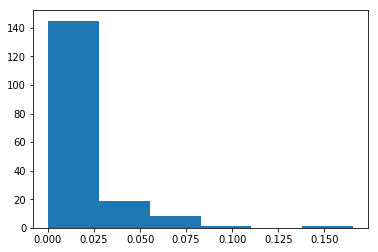

In [103]:
plt.hist(lista_pib, bins=6)

In [104]:
pib_bmi.head()

,Country,Poblacion,Million Dolar,Male,Female,BMI medio,pib/poblacion
0,China,1386395000,1.223770e+07,24.2,23.6,23.90,0.008827
1,India,1339180000,2.597491e+06,21.8,22.1,21.95,0.001940
2,United States,325719000,1.939060e+07,28.8,28.8,28.80,0.059532
3,Indonesia,263991000,1.015539e+06,22.4,23.4,22.90,0.003847
4,Brazil,209288000,2.055506e+06,25.9,26.0,25.95,0.009821


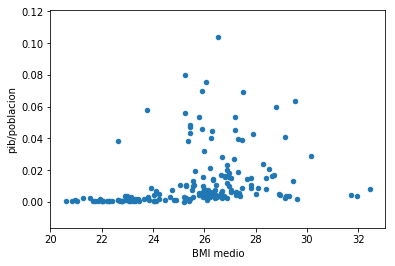

In [108]:
pib_bmi.plot(kind='scatter', x='BMI medio', y='pib/poblacion')

In [109]:
#vamos a intentar predecir si hay sobrepeso a traves poblacion y pib.

In [110]:
archivo_pib_bmi = "imc_vs_pib.xlsx"

In [111]:
df = pd.read_excel(path_to_zips + archivo_pib_bmi)

In [112]:
df.head()

,Country,Poblacion,Million Dolar,Male,Female,BMI medio,pib/poblacion
0,China,1386395000,1.223770e+07,24.2,23.6,23.90,0.008827
1,India,1339180000,2.597491e+06,21.8,22.1,21.95,0.001940
2,United States,325719000,1.939060e+07,28.8,28.8,28.80,0.059532
3,Indonesia,263991000,1.015539e+06,22.4,23.4,22.90,0.003847
4,Brazil,209288000,2.055506e+06,25.9,26.0,25.95,0.009821


In [113]:
df.isnull().sum()

Country          0
Poblacion        0
Million Dolar    0
Male             3
Female           3
BMI medio        3
pib/poblacion    0
dtype: int64

In [114]:
df2 = df.dropna()

In [115]:
df2.isnull().sum()

Country          0
Poblacion        0
Million Dolar    0
Male             0
Female           0
BMI medio        0
pib/poblacion    0
dtype: int64

In [116]:
df2.loc[:,"Sobrepeso"] = 0
df2.head()

/home/dsc/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/dsc/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Country,Poblacion,Million Dolar,Male,Female,BMI medio,pib/poblacion,Sobrepeso
0,China,1386395000,1.223770e+07,24.2,23.6,23.90,0.008827,0
1,India,1339180000,2.597491e+06,21.8,22.1,21.95,0.001940,0
2,United States,325719000,1.939060e+07,28.8,28.8,28.80,0.059532,0
3,Indonesia,263991000,1.015539e+06,22.4,23.4,22.90,0.003847,0
4,Brazil,209288000,2.055506e+06,25.9,26.0,25.95,0.009821,0


In [117]:
df2["Sobrepeso"] = [1 if x>=25 else 0 for x in df2["BMI medio"]]

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
df2.head()

,Country,Poblacion,Million Dolar,Male,Female,BMI medio,pib/poblacion,Sobrepeso
0,China,1386395000,1.223770e+07,24.2,23.6,23.90,0.008827,0
1,India,1339180000,2.597491e+06,21.8,22.1,21.95,0.001940,0
2,United States,325719000,1.939060e+07,28.8,28.8,28.80,0.059532,1
3,Indonesia,263991000,1.015539e+06,22.4,23.4,22.90,0.003847,0
4,Brazil,209288000,2.055506e+06,25.9,26.0,25.95,0.009821,1


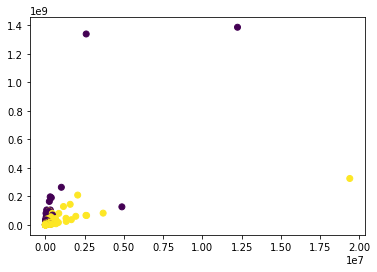

In [140]:
plt.scatter(df2["Million Dolar"], df2["Poblacion"], c=df2["Sobrepeso"])

In [ ]:
#vemos que hay outliers tanto en pib como en poblacion

In [141]:
X = df2[["Million Dolar","Poblacion"]].values 
y = df2["Sobrepeso"]

In [142]:
X[:5]

array([[1.22377005e+07, 1.38639500e+09],
       [2.59749116e+06, 1.33918000e+09],
       [1.93906040e+07, 3.25719000e+08],
       [1.01553902e+06, 2.63991000e+08],
       [2.05550550e+06, 2.09288000e+08]])

In [143]:
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Sobrepeso, dtype: int64

In [144]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [145]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [148]:
clf.predict([[1.22377005e+07,1.38639500e+09]])

array([0])

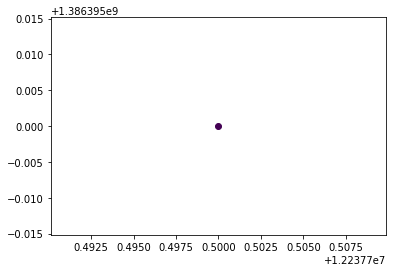

In [154]:
plt.scatter([1.22377005e+07],[1.38639500e+09],c=[0])

In [155]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)  

In [173]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
accuracy_score(y_test, clf.predict(X_test))

0.8

In [176]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y)

array([0.32758621, 0.10526316, 0.67857143])

In [177]:
cross_val_score(clf, X, y, cv=10)

array([0.33333333, 0.        , 0.05555556, 0.44444444, 0.66666667,
       0.23529412, 0.25      , 0.        , 0.375     , 0.6875    ])

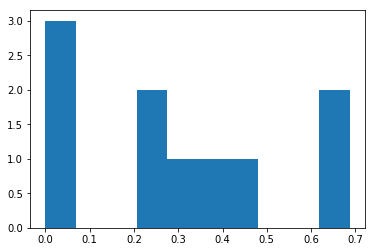

In [178]:
s = cross_val_score(clf, X, y, cv=10)
plt.hist(s);

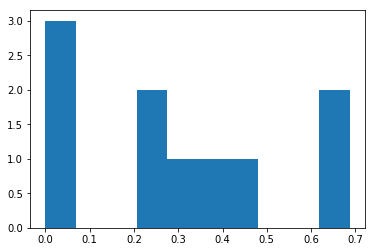

In [179]:
s = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
plt.hist(s);

In [180]:
from ipywidgets import interact

In [181]:
@interact(k=5)
def show(k):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)
    print(cross_val_score(clf,X,y,cv=10,scoring="accuracy").mean())

interactive(children=(IntSlider(value=5, description='k', max=15, min=-5), Output()), _dom_classes=('widget-interact',))

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
clf2=GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
                  param_grid={"n_neighbors":np.arange(1,50)},)

#hemos creado un clasificador para saber con que numero de vecinos es el mejor parametro para el scoring que le demos

In [184]:
clf2.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [185]:
clf2.best_params_

{'n_neighbors': 47}

In [ ]:
# La conclusión que podemos tomar es que las diferencia entre países no nos hace sacar un modelo claro de comportamiento.